In [96]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc,recall_score,precision_score

%matplotlib inline

# Load the NBA statistical data from Kaggle
https://www.kaggle.com/drgilermo/nba-players-stats

In [97]:
data = pd.read_csv('data/Seasons_Stats.csv')
# data.loc[data['Player'] == 'LeBron James'].T
data.T

,0,1,2,3,4,5,6,7,8,9,...,24681,24682,24683,24684,24685,24686,24687,24688,24689,24690
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,24681,24682,24683,24684,24685,24686,24687,24688,24689,24690
Year,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
Player,Curly Armstrong,Cliff Barker,Leo Barnhorst,Ed Bartels,Ed Bartels,Ed Bartels,Ralph Beard,Gene Berce,Charlie Black,Charlie Black,...,Delon Wright,James Young,Joe Young,Nick Young,Thaddeus Young,Cody Zeller,Tyler Zeller,Stephen Zimmerman,Paul Zipser,Ivica Zubac
Pos,G-F,SG,SF,F,F,F,G,G-F,F-C,F-C,...,PG,SG,PG,SG,PF,PF,C,C,SF,C
Age,31,29,25,24,24,24,22,23,28,28,...,24,21,24,31,28,24,27,20,22,19
Tm,FTW,INO,CHS,TOT,DNN,NYK,INO,TRI,TOT,FTW,...,TOR,BOS,IND,LAL,IND,CHO,BOS,ORL,CHI,LAL
G,63,49,67,15,13,2,60,3,65,36,...,27,29,33,60,74,62,51,19,44,38
GS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,60,74,58,5,0,18,11
MP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,446,220,135,1556,2237,1725,525,108,843,609
PER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,10,11.4,14.1,14.9,16.7,13,7.3,6.9,17


In [98]:
# check the shape
data.shape


(24691, 53)

# clean it up a little

In [99]:
data = data.replace('?', np.nan)
data.T

,0,1,2,3,4,5,6,7,8,9,...,24681,24682,24683,24684,24685,24686,24687,24688,24689,24690
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,24681,24682,24683,24684,24685,24686,24687,24688,24689,24690
Year,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
Player,Curly Armstrong,Cliff Barker,Leo Barnhorst,Ed Bartels,Ed Bartels,Ed Bartels,Ralph Beard,Gene Berce,Charlie Black,Charlie Black,...,Delon Wright,James Young,Joe Young,Nick Young,Thaddeus Young,Cody Zeller,Tyler Zeller,Stephen Zimmerman,Paul Zipser,Ivica Zubac
Pos,G-F,SG,SF,F,F,F,G,G-F,F-C,F-C,...,PG,SG,PG,SG,PF,PF,C,C,SF,C
Age,31,29,25,24,24,24,22,23,28,28,...,24,21,24,31,28,24,27,20,22,19
Tm,FTW,INO,CHS,TOT,DNN,NYK,INO,TRI,TOT,FTW,...,TOR,BOS,IND,LAL,IND,CHO,BOS,ORL,CHI,LAL
G,63,49,67,15,13,2,60,3,65,36,...,27,29,33,60,74,62,51,19,44,38
GS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,60,74,58,5,0,18,11
MP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,446,220,135,1556,2237,1725,525,108,843,609
PER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,10,11.4,14.1,14.9,16.7,13,7.3,6.9,17


# Initialize an all_nba column to store all NBA team stats

In [100]:
zero_data = np.zeros(shape=(len(data),1))
zero_data.shape
data = data.assign(all_nba = zero_data)

In [101]:
# set the all nba team column

allnba = pd.read_csv('data/all_nba_teams_clean.csv')
# allnba.loc[allnba['Player'] == "LeBron James"]
allnba



,Year,all_nba,Player
0,2017.0,1,LeBron James
1,2017.0,1,Kevin Durant
2,2017.0,1,Anthony Davis
3,2017.0,1,James Harden
4,2017.0,1,Damian Lillard
...,...,...,...
775,1955.0,2,Maurice Stokes
776,1955.0,2,Dolph Schayes
777,1955.0,2,Clyde Lovellette
778,1955.0,2,Jack George


In [102]:
# update the all_nba column with the new all_nba stats

res = allnba.set_index(['Year', 'Player'])\
         .combine_first(data.set_index(['Year', 'Player']))\
         .reset_index()

res.T

# Check LeBron's all_nba teams
# res.loc[res['Player'] == "LeBron James"].T

# res

# #
# res.drop(['Year'],[''])

# Looks good! Let's do some one-hot encoding
# one_hot = pd.get_dummies(res, prefix=['all_nba'])


,0,1,2,3,4,5,6,7,8,9,...,25123,25124,25125,25126,25127,25128,25129,25130,25131,25132
Year,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
Player,Al Cervi*,Al Guokas,Al Guokas,Al Guokas,Al Miksis,Alex Groza,Alex Hannum*,Andrew Levane,Andy Duncan,Andy O'Donnell,...,Willie Cauley-Stein,Willie Reed,Willy Hernangomez,Wilson Chandler,Yogi Ferrell,Yogi Ferrell,Yogi Ferrell,Zach LaVine,Zach Randolph,Zaza Pachulia
2P,143,93,86,7,5,521,177,139,125,38,...,255,161,242,323,92,10,82,206,412,164
2P%,0.332,0.311,0.317,0.25,0.238,0.478,0.363,0.333,0.433,0.352,...,0.532,0.573,0.538,0.527,0.422,0.455,0.418,0.515,0.474,0.538
2PA,431,299,271,28,21,1090,488,418,289,108,...,479,281,450,613,218,22,196,400,870,305
3P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,4,110,68,8,60,120,21,0
3P%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.25,0.267,0.337,0.386,0.296,0.403,0.387,0.223,0
3PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,4,15,326,176,27,149,310,94,2
3PAr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004,0.014,0.032,0.347,0.447,0.551,0.432,0.437,0.098,0.007
AST,264,95,85,10,4,162,129,156,42,17,...,80,26,96,141,172,17,155,139,122,132


# Columns

```
2P
2P%
2PA
3P
3P%
3PA
AST
AST%
BLK
BLK%
BPM
DRB
DRB%
eFG%
FG
FG%
FGA
FT
FT%
FTA
G
GS
MP
ORB
OBR%
PER
PF
STL
STL%
TOV
TOV%
TRB
TRB%
TS%
WS
WS/48
```

In [103]:
# create the dataset for ML

df_1955 = res[res.Year > 2009]
df_ml = df_1955[['2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST', 
                 'AST%', 'BLK', 'BLK%', 'BPM', 'DRB',  
                 'eFG%', 'FG', 'FGA', 'FT', 'FT%', 'FTA', 
                 'G', 'GS', 'MP', 'ORB', 'ORB%', 'PER', 'PF', 'STL', 
                 'TOV', 'TOV%', 'TRB', 'TRB%', 'TS%', 
                 'WS', 'WS/48']].copy()

df_anba = df_1955[['all_nba']].copy()


from sklearn.model_selection import train_test_split
# X, y = df_ml.iloc[:, :-1], res.iloc[:, -1]



X_train, X_test, y_train, y_test = train_test_split(df_ml, df_anba, test_size=0.2, random_state=123)




In [104]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=df_ml,label=df_anba)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=4, scale_pos_weight=31)

xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=31,
             subsample=1, tree_method='auto', verbosity=1)

In [105]:
preds = xg_reg.predict(X_test)
preds

array([ 2.74028182e-02,  3.99649143e-05, -1.03526711e-02,  6.46169782e-02,
        3.99649143e-05,  3.48199010e-02,  2.99358368e-03,  1.61230564e-05,
        9.65796232e-01,  1.47743523e-02,  4.97460365e-04, -2.94268131e-04,
        3.99649143e-05,  3.99649143e-05,  1.61230564e-05, -1.15448236e-03,
        2.99358368e-03, -2.94268131e-04, -1.45605385e-01, -2.97623873e-03,
        3.99649143e-05, -2.94268131e-04, -1.15448236e-03,  1.74331665e-03,
       -2.94268131e-04, -8.38720798e-03, -3.26770544e-03, -2.94268131e-04,
       -1.54435635e-03,  1.20533705e-02,  2.99358368e-03, -2.94268131e-04,
        2.99358368e-03, -2.94268131e-04,  4.97460365e-04, -3.06470990e-02,
        2.32373267e-01,  2.85744369e-02,  1.61230564e-05,  1.61230564e-05,
        3.99649143e-05, -3.96859646e-03, -3.03548574e-03,  1.61230564e-05,
        1.61230564e-05,  9.33021307e-04, -1.16354823e-02,  1.74331665e-03,
       -6.61772490e-03, -1.21021271e-03,  7.44822621e-03,  2.24451125e-01,
        4.97460365e-04,  

In [106]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

0.3383290938108869

In [107]:
params = {'learning_rate': 0.1, 'max_depth': 5, "objective": "reg:squarederror",
          'tree_method': 'hist'}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="mae", as_pandas=True, seed=123)
cv_results.head(10)

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.477131,0.001696,0.479889,0.004635
1,0.433001,0.001449,0.438104,0.004681
2,0.393234,0.001369,0.400669,0.004500
3,0.357469,0.001371,0.367148,0.004652
4,0.325222,0.001275,0.337046,0.004770
5,0.296315,0.001297,0.310173,0.004439
6,0.270084,0.001133,0.285707,0.004347
7,0.246448,0.001144,0.263801,0.004250
8,0.225049,0.001193,0.244281,0.004494
9,0.205758,0.001152,0.226621,0.004499


<module 'matplotlib' from '/home/pjames/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

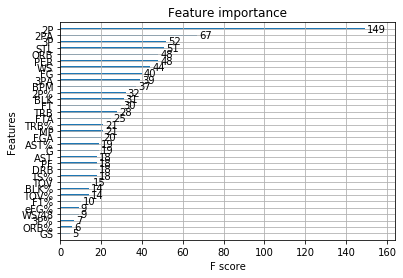

In [108]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt